# Importing necessary libraries 

In [90]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import  MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score,KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import numpy as np 


# Data collection 

In [2]:
data = pd.read_csv("insurance.csv")
print(data)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


# Explorative Data Analysis

## Data inspection 

In [88]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.tail()


,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


## Data types of the columns 

In [4]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

## Information about the column of a dataframe 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Number of rows and columns in a dataframe

In [6]:
data.shape


(1338, 7)

## Descriptive Statistics 

In [7]:
data.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Inspection of missing value


In [8]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Univariate data analysis

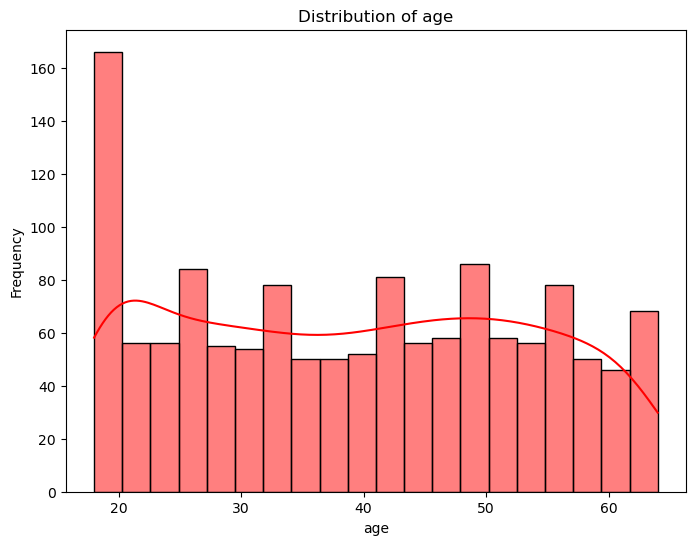

In [62]:
plt.figure(figsize=(8,6))
sns.histplot(data['age'], bins=20, kde=True,color='red')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('Distribution of age')
plt.show()

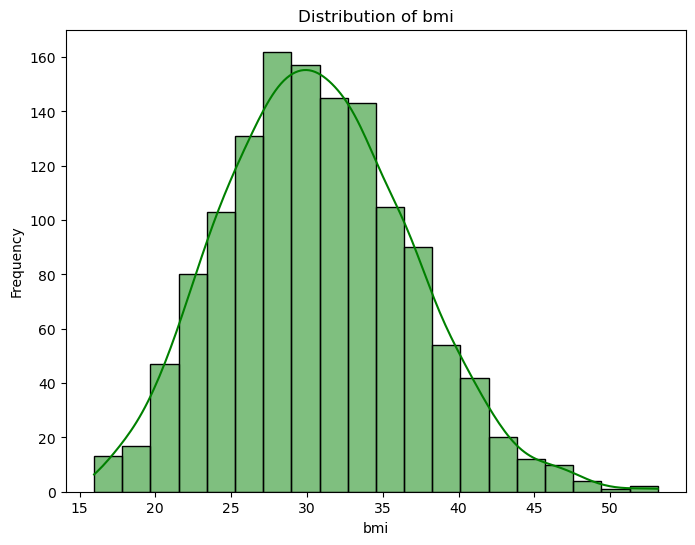

In [10]:
plt.figure(figsize=(8,6))
sns.histplot(data['bmi'], bins=20, kde=True,color='green')
plt.xlabel('bmi')
plt.ylabel('Frequency')
plt.title('Distribution of bmi');
plt.show()

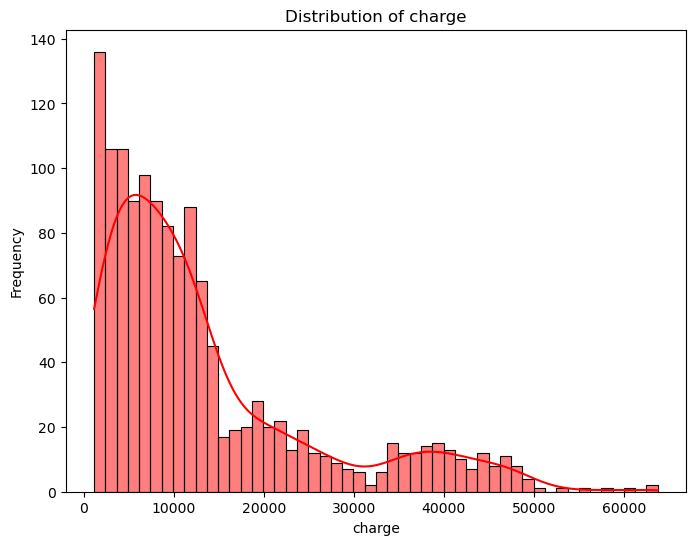

In [66]:
plt.figure(figsize=(8,6))
sns.histplot(data['charges'], bins=50, kde=True,color='red')
plt.xlabel('charge')
plt.ylabel('Frequency')
plt.title('Distribution of charge');
plt.show()

In [68]:
data['charges'].median()

9382.033

Text(0.5, 1.0, 'countplot for region column')

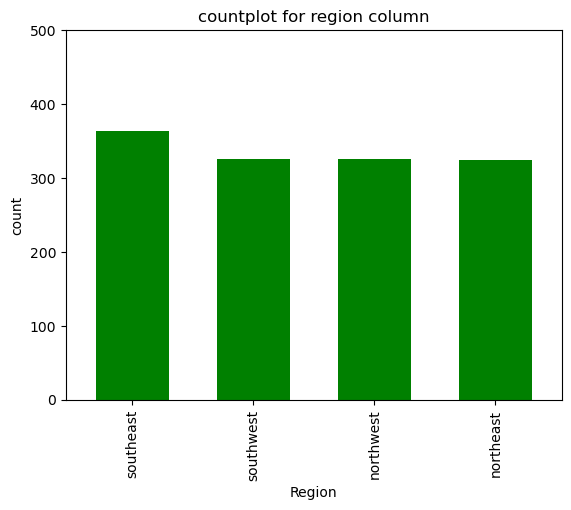

In [12]:
data['region'].value_counts().plot(kind='bar',width =0.6,color = 'green')
plt.ylim(0,500)
plt.xlabel('Region')
plt.ylabel('count')
plt.title('countplot for region column')

([<matplotlib.patches.Wedge at 0x202dd86c5b0>,
 [Text(-0.018078568997004985, 1.0998514287589123, 'male'),
  Text(0.018078568997005343, -1.0998514287589123, 'female')],
 [Text(-0.009861037634729992, 0.5999189611412249, '51%'),
  Text(0.009861037634730185, -0.5999189611412248, '49%')])

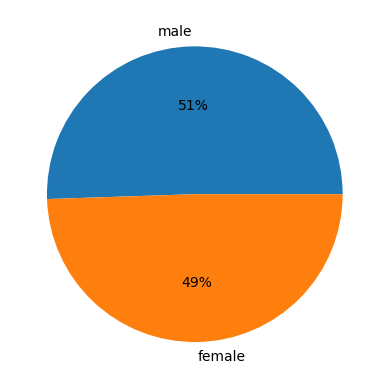

In [13]:
data1 = data['sex'].value_counts()
plt.pie(data1,labels=data1.keys(), autopct='%.0f%%')

## Bivariate analysis

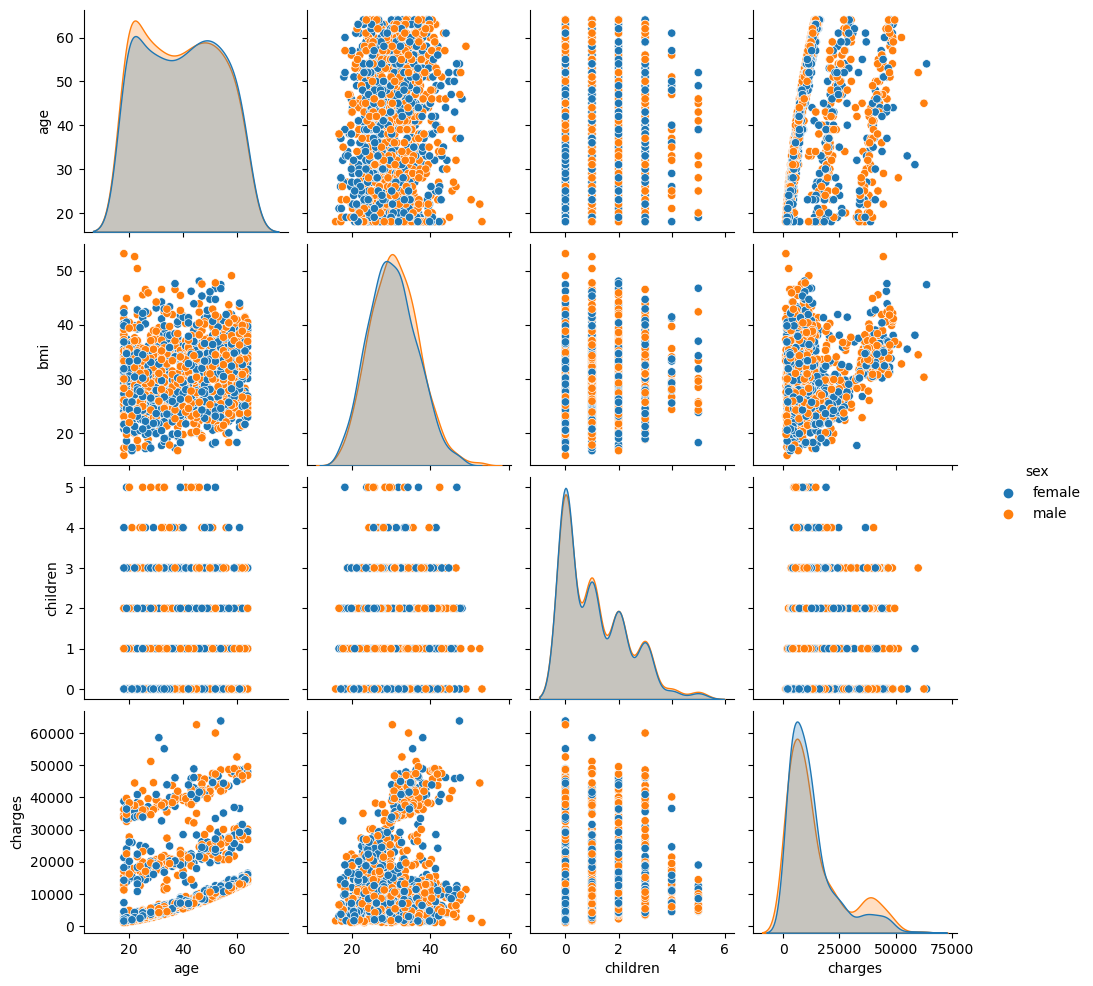

In [89]:
sns.pairplot(data,diag_kind='kde',hue='sex')
plt.show()

<AxesSubplot:>

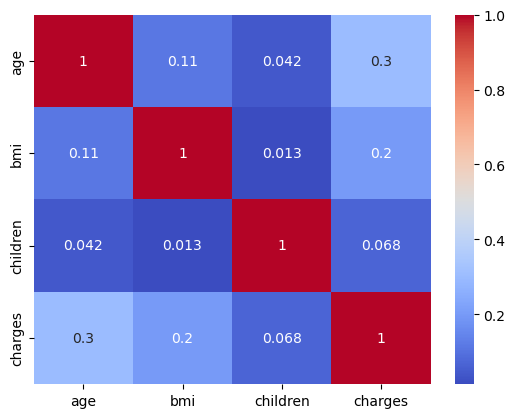

In [15]:
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

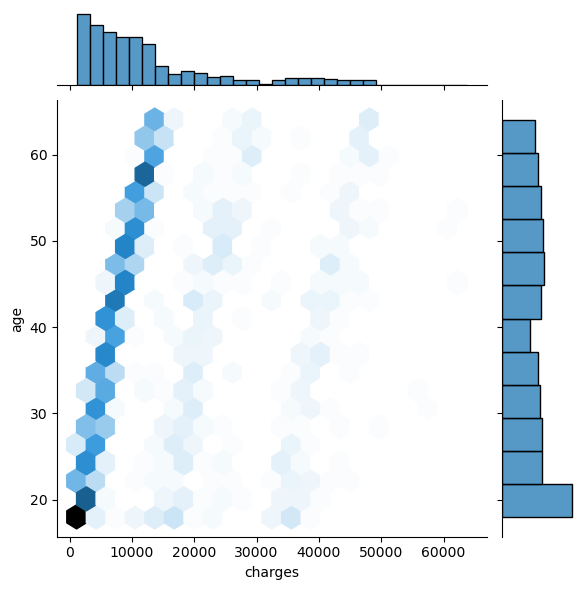

In [84]:
sns.jointplot(x='charges',y='age',data=data,kind='hex')

<AxesSubplot:xlabel='charges', ylabel='age'>

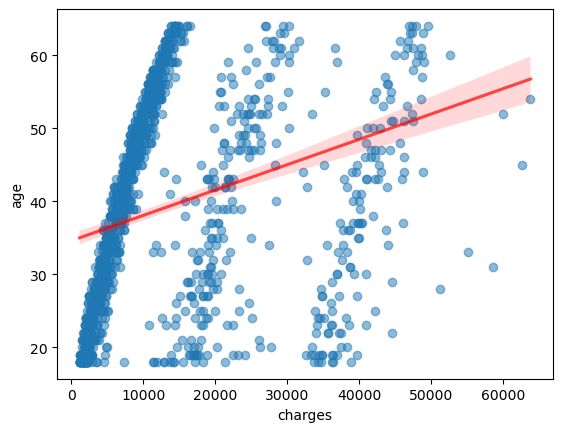

In [16]:
sns.regplot(x='charges',y='age',data=data,scatter_kws={'alpha': 0.5},line_kws={'alpha': 0.7, 'color': 'red'})

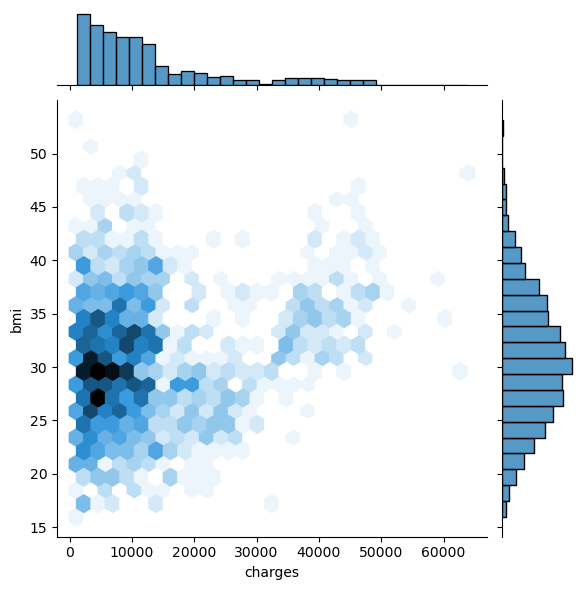

In [78]:
sns.jointplot(x='charges',y='bmi',data=data,kind='hex')

<AxesSubplot:xlabel='charges', ylabel='bmi'>

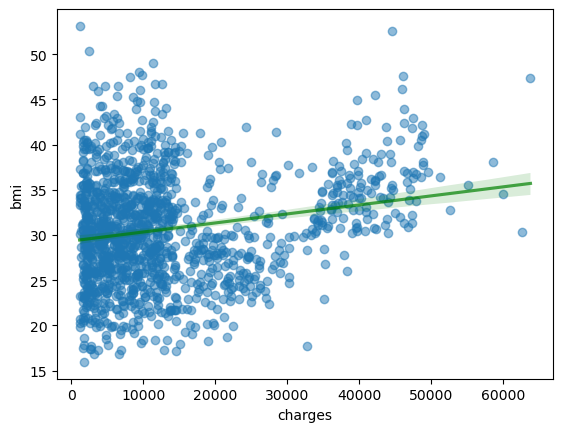

In [17]:
sns.regplot(x='charges',y='bmi',data=data,scatter_kws={'alpha': 0.5},line_kws={'alpha': 0.7, 'color': 'green'})

In [18]:
dada = pd.crosstab(data['region'],data['sex'])
print(dada)

sex        female  male
region                 
northeast     161   163
northwest     164   161
southeast     175   189
southwest     162   163


Text(0, 0.5, 'count')

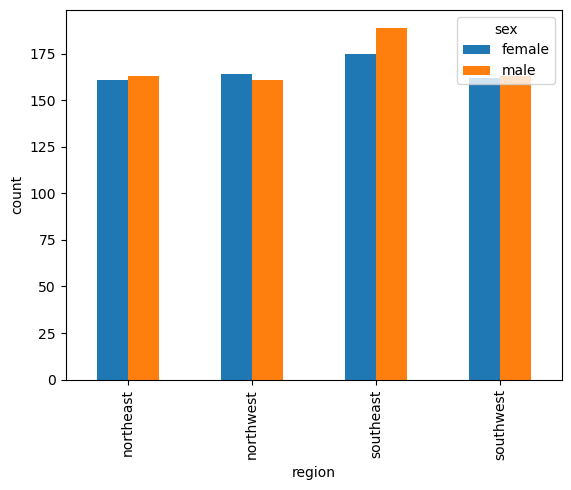

In [71]:
dada.plot(kind='bar',stacked=False)
plt.ylabel('count')

# Label Encoding 

In [104]:
encoder = LabelEncoder()
encoded_gender = encoder.fit_transform(data['sex'])
data_sex = pd.DataFrame(encoded_gender)
data['sex_encoded'] = data_sex
encoded_smoker = encoder.fit_transform(data['smoker'])
data['encoded_smoker'] = encoded_smoker
print(data.head(20))


    age     sex     bmi  children smoker     region      charges  sex_encoded  \
0    19  female  27.900         0    yes  southwest  16884.92400            0   
1    18    male  33.770         1     no  southeast   1725.55230            1   
2    28    male  33.000         3     no  southeast   4449.46200            1   
3    33    male  22.705         0     no  northwest  21984.47061            1   
4    32    male  28.880         0     no  northwest   3866.85520            1   
5    31  female  25.740         0     no  southeast   3756.62160            0   
6    46  female  33.440         1     no  southeast   8240.58960            0   
7    37  female  27.740         3     no  northwest   7281.50560            0   
8    37    male  29.830         2     no  northeast   6406.41070            1   
9    60  female  25.840         0     no  northwest  28923.13692            0   
10   25    male  26.220         0     no  northeast   2721.32080            1   
11   62  female  26.290     

# Removing columns 

In [108]:

dataframe.drop(['sex','smoker'], axis=1, inplace=False)
# 0 is female and no 

      age     bmi  children     region      charges  sex_encoded  \
0      19  27.900         0  southwest  16884.92400            0   
1      18  33.770         1  southeast   1725.55230            1   
2      28  33.000         3  southeast   4449.46200            1   
3      33  22.705         0  northwest  21984.47061            1   
4      32  28.880         0  northwest   3866.85520            1   
...   ...     ...       ...        ...          ...          ...   
1333   50  30.970         3  northwest  10600.54830            1   
1334   18  31.920         0  northeast   2205.98080            0   
1335   18  36.850         0  southeast   1629.83350            0   
1336   21  25.800         0  southwest   2007.94500            0   
1337   61  29.070         0  northwest  29141.36030            0   

      encoded_smoker  
0                  1  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
1333               0  

# Changing the order of the dataframe columns 

In [117]:
data = data.loc[:,['age','bmi','children','region','sex_encoded','encoded_smoker','charges']]
print(data)

      age     bmi  children     region  sex_encoded  encoded_smoker  \
0      19  27.900         0  southwest            0               1   
1      18  33.770         1  southeast            1               0   
2      28  33.000         3  southeast            1               0   
3      33  22.705         0  northwest            1               0   
4      32  28.880         0  northwest            1               0   
...   ...     ...       ...        ...          ...             ...   
1333   50  30.970         3  northwest            1               0   
1334   18  31.920         0  northeast            0               0   
1335   18  36.850         0  southeast            0               0   
1336   21  25.800         0  southwest            0               0   
1337   61  29.070         0  northwest            0               1   

          charges  
0     16884.92400  
1      1725.55230  
2      4449.46200  
3     21984.47061  
4      3866.85520  
...           ...  
1333  1

# Feature  scaling 


In [162]:
scaler =  MinMaxScaler()
scale_data =scaler.fit_transform(data[['age','bmi']])
data12 = pd.DataFrame(scale_data)
print(data12.head())

          0         1
0  0.021739  0.321227
1  0.000000  0.479150
2  0.217391  0.458434
3  0.326087  0.181464
4  0.304348  0.347592


In [134]:
# feature 
X = data.drop(['charges','region'],axis=1)
y= data['charges'] # target data 

In [135]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [136]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [164]:
y_pred = model.predict(X_train)

In [165]:
slope = model.coef_
print(slope)

[ 2.57068962e+02  3.27533514e+02  4.27254431e+02 -7.95178837e+00
  2.36539033e+04]


In [166]:
intercept = model.intercept_
print(intercept)

-12113.451250917087


In [168]:
r2 = r2_score(y_train, y_pred)
print(r2)
y_predict = pd.DataFrame(y_pred)


0.7410888590280913


Text(0.5, 1.0, 'Actual vs. Predicted Values')

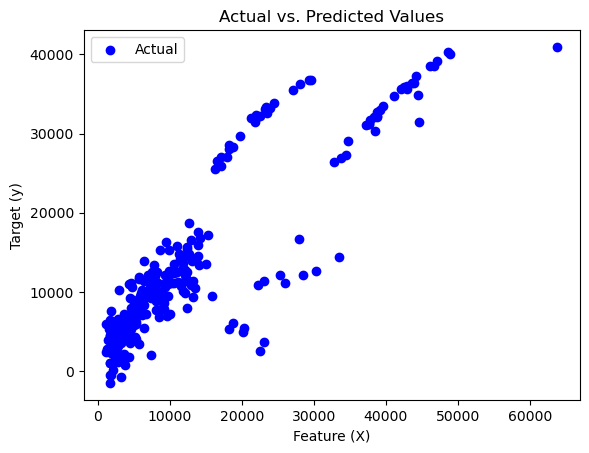

In [148]:
plt.scatter(y_test, y_predict, label='Actual', color='blue')

plt.plot()
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.legend()
plt.title('Actual vs. Predicted Values')

In [141]:
X_test.shape

(268, 5)

In [143]:
y_test.shape


(268,)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

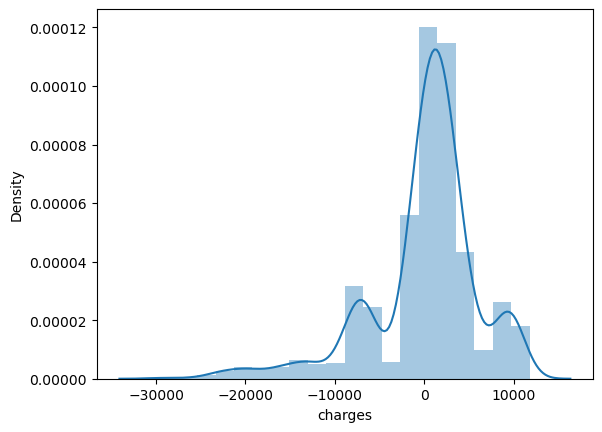

In [170]:
sns.distplot((y_pred - y_train),bins=20)